<a href="https://colab.research.google.com/github/mukeshcse07/Machine-Learning-Project/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [3]:
file_path = '/content/online_shoppers_intention.csv'
data = pd.read_csv(file_path)
numeric_cols = data.select_dtypes(include=[np.number]).columns
categorical_cols = data.select_dtypes(include=[object]).columns
imputer_num = SimpleImputer(strategy='mean')
data[numeric_cols] = imputer_num.fit_transform(data[numeric_cols])
imputer_cat = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = imputer_cat.fit_transform(data[categorical_cols])
for col in categorical_cols:
    data[col] = data[col].astype('category').cat.codes
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
print(f'Number of missing values before scaling: \n{data.isnull().sum()}')


Number of missing values before scaling: 
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


Silhouette Score: 0.44946713612184525


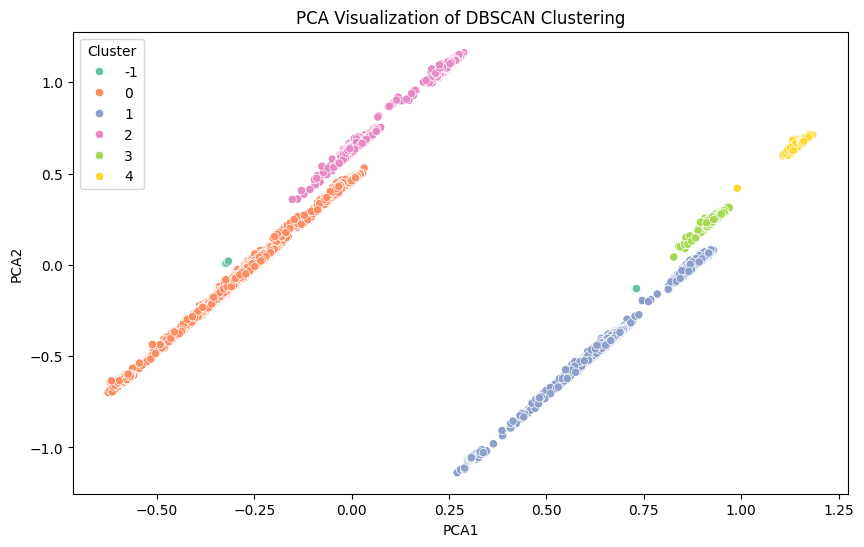

For eps = 0.1, min_samples = 3, the silhouette score is 0.4837199099985871
For eps = 0.1, min_samples = 4, the silhouette score is 0.5105470809845204
For eps = 0.1, min_samples = 5, the silhouette score is 0.4977527416992471
For eps = 0.1, min_samples = 6, the silhouette score is 0.5177800917859664
For eps = 0.1, min_samples = 7, the silhouette score is 0.5404994801476836
For eps = 0.1, min_samples = 8, the silhouette score is 0.49027281515097115
For eps = 0.1, min_samples = 9, the silhouette score is 0.456113988940274
For eps = 0.2, min_samples = 3, the silhouette score is 0.3196041535928872
For eps = 0.2, min_samples = 4, the silhouette score is 0.30149536983483033
For eps = 0.2, min_samples = 5, the silhouette score is 0.33223487856938466
For eps = 0.2, min_samples = 6, the silhouette score is 0.33225478808638664
For eps = 0.2, min_samples = 7, the silhouette score is 0.34502421744584627
For eps = 0.2, min_samples = 8, the silhouette score is 0.3486748242371343
For eps = 0.2, min_sa

In [6]:
pca = PCA(n_components=5)
data_pca = pca.fit_transform(data_scaled)


dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(data_pca)

if len(set(clusters)) > 1 and len(set(clusters)) != 1:
    silhouette_avg = silhouette_score(data_pca, clusters)
    print(f'Silhouette Score: {silhouette_avg}')
else:
    print("Unable to compute Silhouette Score (perhaps only noise or one cluster).")

data['Cluster'] = clusters

pca_2d = PCA(n_components=2)
pca_result = pca_2d.fit_transform(data_pca)

pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = data['Cluster']


plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='Set2', data=pca_df)
plt.title('PCA Visualization of DBSCAN Clustering')
plt.show()
best_eps = 0
best_min_samples = 0
best_score = -1

for eps_val in np.arange(0.1, 1.0, 0.1):
    for min_samples_val in range(3, 10):
        dbscan = DBSCAN(eps=eps_val, min_samples=min_samples_val)
        clusters = dbscan.fit_predict(data_pca)


        if len(set(clusters)) > 1 and len(set(clusters)) != 1:
            silhouette_avg = silhouette_score(data_pca, clusters)
            print(f'For eps = {eps_val}, min_samples = {min_samples_val}, the silhouette score is {silhouette_avg}')

            if silhouette_avg > best_score:
                best_eps = eps_val
                best_min_samples = min_samples_val
                best_score = silhouette_avg

print(f'\nBest parameters found: eps = {best_eps}, min_samples = {best_min_samples}, with silhouette score = {best_score}')


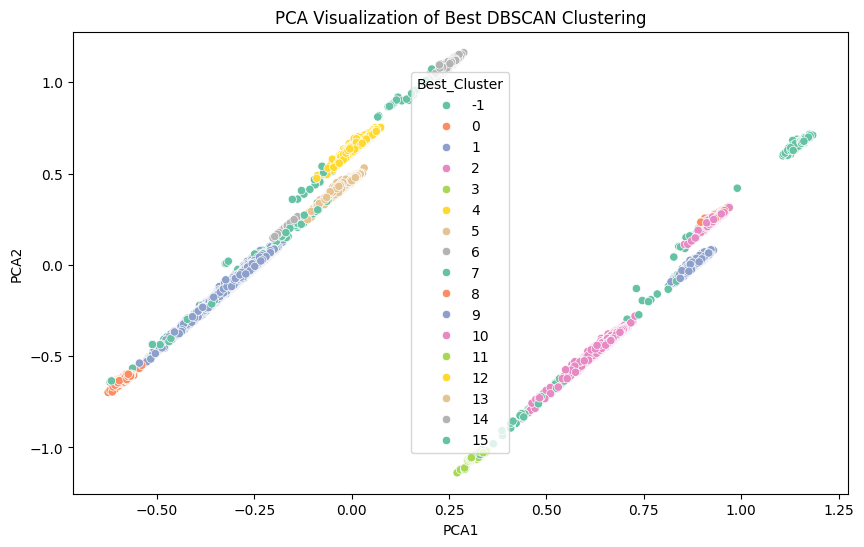

In [7]:
dbscan_best = DBSCAN(eps=best_eps, min_samples=best_min_samples)
clusters_best = dbscan_best.fit_predict(data_pca)

data['Best_Cluster'] = clusters_best

plt.figure(figsize=(10, 6))
pca_df['Best_Cluster'] = clusters_best
sns.scatterplot(x='PCA1', y='PCA2', hue='Best_Cluster', palette='Set2', data=pca_df)
plt.title('PCA Visualization of Best DBSCAN Clustering')
plt.show()
